In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
# #LCM
# input_params_v = [0.19160686191029153, 0.33654088441659835, 1297.0]
# input_params_T = [1.2712742342596, 4.5304690785545345]
# switch_time = 0.08016031211049071

In [35]:
# #VCM
# input_params_v = [0.6143566934484914, 0.45545188382325563, 61472.0]
# input_params_T = [3.8697628775319624, 0.031480852000795936]
# switch_time = 0.04484879316039632

In [36]:
#HCM
input_params_v = [0.4363668901147618, 0.4635361941078273, 44579.0]
input_params_T = [0.09347836436182798, 0.0427089935241202]
switch_time = 0.014957821003062005

In [37]:
time_ga = 1300000

first_part = int(switch_time*time_ga)
second_part = int((1-switch_time)*time_ga)+1

M1 = np.ones(first_part)*input_params_T[0]
M2 = np.ones(second_part)*input_params_T[1]

M_ga = np.concatenate((M1, M2))

In [38]:
A = input_params_v[0]
f = input_params_v[1]
T = input_params_v[2]
a0 = A*f
an = np.array([2*A/(n*np.pi) * np.sin(n*np.pi*f) for n in range(1, 6)])
bn = np.array([0 for n in range(1, 6)])

P = int(T)
pi = np.pi

it = np.arange(time_ga)

v = a0/2 + an[0]*np.cos(2*pi*it/P) + bn[0]*np.sin(2*pi*it/P) \
  + an[1]*np.cos(2*pi*it*2/P) + bn[1]*np.sin(2*pi*it*2/P) \
  + an[2]*np.cos(2*pi*it*3/P) + bn[2]*np.sin(2*pi*it*3/P) \
  + an[3]*np.cos(2*pi*it*4/P) + bn[3]*np.sin(2*pi*it*4/P) \
  + an[4]*np.cos(2*pi*it*5/P) + bn[4]*np.sin(2*pi*it*5/P)

max_v = max(v)
min_v = min(v)

scaled_max = 0
scaled_min = -max_v

scaling_factor = (scaled_max - scaled_min)/(max_v - min_v)

an_star = an*scaling_factor
bn_star = bn*scaling_factor
a0_star = a0*scaling_factor + 2*scaled_min - 2*min_v*scaling_factor

a0_star = np.array([a0_star])
P = np.array([P], dtype='int')
bounded_params = list(np.concatenate([a0_star, an_star, bn_star, P]))

In [39]:
v_ga = a0_star/2 + an_star[0]*np.cos(2*pi*it/P) + bn_star[0]*np.sin(2*pi*it/P) \
  + an_star[1]*np.cos(2*pi*it*2/P) + bn_star[1]*np.sin(2*pi*it*2/P) \
  + an_star[2]*np.cos(2*pi*it*3/P) + bn_star[2]*np.sin(2*pi*it*3/P) \
  + an_star[3]*np.cos(2*pi*it*4/P) + bn_star[3]*np.sin(2*pi*it*4/P) \
  + an_star[4]*np.cos(2*pi*it*5/P) + bn_star[4]*np.sin(2*pi*it*5/P)

<IPython.core.display.Javascript object>


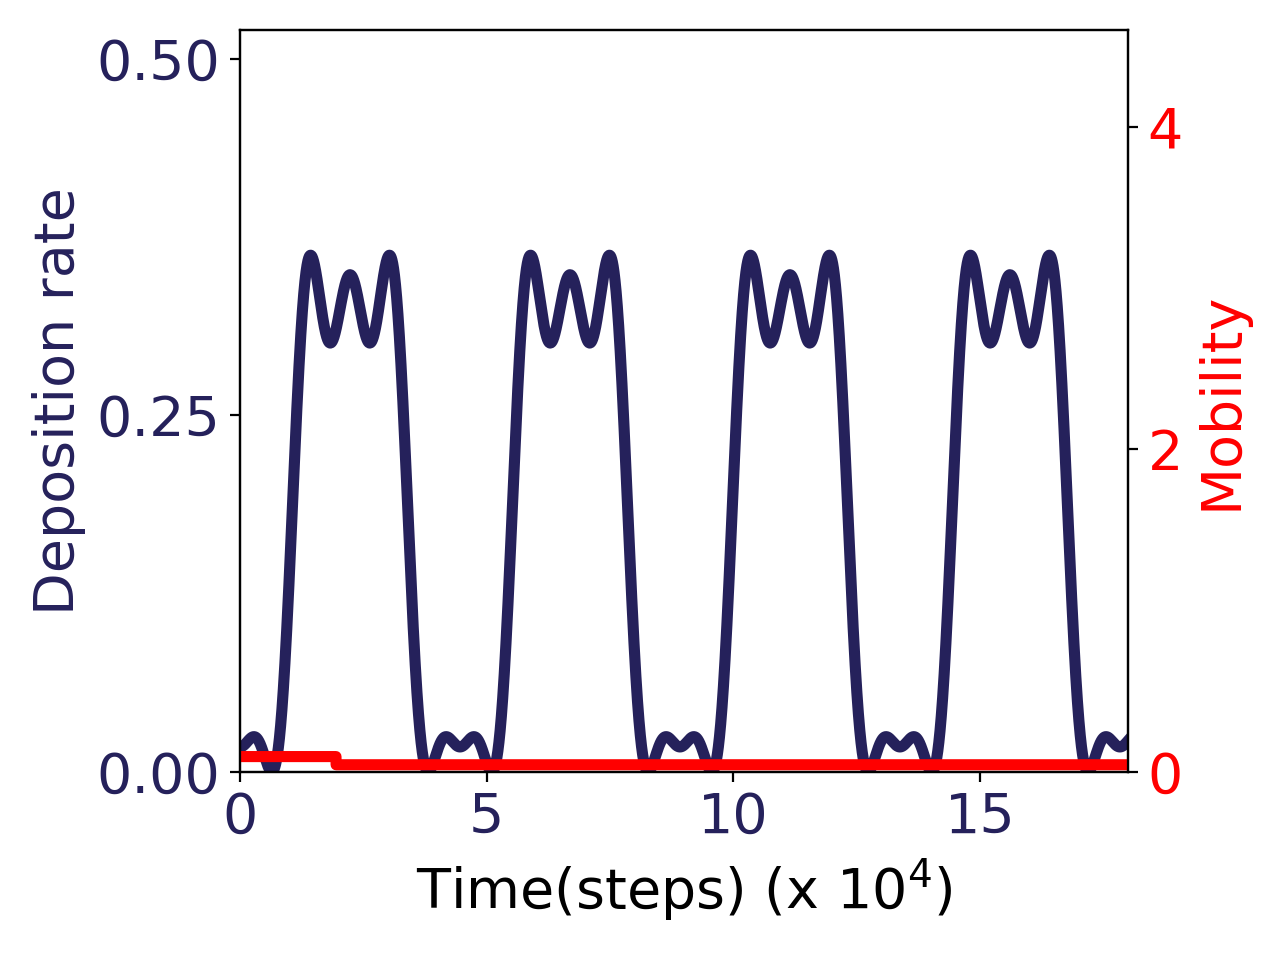

In [41]:
%matplotlib notebook
fig, ax1 = plt.subplots()

color = '#25215b'
ax1.set_xlabel("Time(steps) (x 10$^{4}$)", fontsize=20)
ax1.set_ylabel('Deposition rate', color=color, fontsize=20)
ax1.set_ylim(0, 0.52)
ax1.plot(it/10000, -v_ga, color=color, lw=4)
ax1.tick_params(axis='x', labelcolor=color, labelsize=20)
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
ax1.set_xticks([0, 5, 10, 15])
ax1.set_yticks([0, 0.25, 0.5])
ax1.set_xlim([0, 18])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Mobility', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(it/10000, M_ga, color=color, lw=4)
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)
ax2.set_ylim(0, 4.6)
ax2.set_yticks([0, 2, 4])

#ax1.set_xlabel()
#ax1.set_ylabel(fontsize=14)
#ax1.set_xticks(fontsize=12)
#ax1.set_yticks(fontsize=12)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()